In [2]:
from radiomics_modules.feature_extraction import FeatureExtractor
from histogram_macthing_modules.histogram_matching import HistogramMatcher

import skimage.io
import utils
import os

In [3]:
PARAMETERS_PATH = os.path.join('radiomics_modules', 'Params.yaml')

DATASET_PATH = os.path.join('data', 'dataset')
FEATURES_OUTPUT_PATH = os.path.join('data', 'pyradiomics_extracted_features.csv')

NEW_DATASET_OUTPUT_PATH = os.path.join('data', 'new_dataset')
NEW_FEATURES_OUTPUT_PATH = os.path.join('data', 'new_pyradiomics_extracted_features.csv')

## 1.0 PREPROCESS DATASET

In [4]:
# Every Image has 3 channels (pre-contrast, FLAIR, post-contrast) and one mask
# Import and Split the channels to different folders 
# It creates new images increasing time and resources consumption
utils.split_dataset(DATASET_PATH)

# utils.merge_slices_into_3D_image(DATASET_PATH, 'pre-contrast')

# Prepare dataset for pyradiomics extractor
# Getting the dataset's path, returns an object specifing for each patient the images and segmentations
pre_contrast_dataset = utils.get_dataset_as_object(DATASET_PATH, 'pre-contrast')  # pre-contrast-3D
flair_dataset = utils.get_dataset_as_object(DATASET_PATH, 'flair')
post_contrast_dataset = utils.get_dataset_as_object(DATASET_PATH, 'post-contrast')

## 2.0 EXTRACT RADIOMICS FEATURES

In [5]:
# Initialize PyRadiomics feature extractor wrapper
feature_extractor = FeatureExtractor(PARAMETERS_PATH)

# Execute batch processing to extract features
feature_extractor.extract_features(post_contrast_dataset, FEATURES_OUTPUT_PATH)

# Get the filepaths from the images only (without the segmentations) as a list
pre_contrast_images = [value['Image'] for value in pre_contrast_dataset.values()]
flair_images = [value['Image'] for value in flair_dataset.values()]
post_contrast_images = [value['Image'] for value in post_contrast_dataset.values()]

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
LBP 3D only available for 3 dimensional images, found 2 dimensions
LBP 3D only available for 3 dimensional images, found 2 dimensions
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
LBP 3D only available for 3 dimensional images, found 2 dimensions
LBP 3D only available for 3 dimensional images, found 2 dimensions
Shape features are only available 3D inp

Failed to extract features.
No labels found in this mask (i.e. nothing is segmented)!


LBP 3D only available for 3 dimensional images, found 2 dimensions
LBP 3D only available for 3 dimensional images, found 2 dimensions
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
LBP 3D only available for 3 dimensional images, found 2 dimensions
LBP 3D only available for 3 dimensional images, found 2 dimensions


## 3.0 HISTOGRAM MATCHING

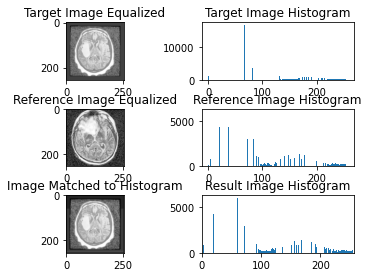

In [ ]:
# Initialize HistogramMatcher & select histogram matching method
histogram_matcher = HistogramMatcher(NEW_DATASET_OUTPUT_PATH, 'ExactHistogramMatching')

# Perform histogram matching
# histogram_matcher.match_histograms(flair_images[0], flair_images[1], display=True)

# Perform Batch histogram matching
histogram_matcher.match_histograms(flair_images, flair_images[4],
                                   display=True)  # TODO: dataset[0] is temporal, should we automate reference image selection?


## 4.0 EXTRACT RADIOMICS FEATURES FROM THE NEW DATASET

In [ ]:
# # Import the dataset
# new_dataset = utils.get_dataset_as_object(NEW_DATASET_OUTPUT_PATH, 'flair')

# # We don't have the segmentations on the new dataset folder because we created it in the previous step
# # by applying histogram matching on the image, not the segmentation.
# # So we need to copy the segmentations paths from the old dataset and add them to the new dataset's dictionary
# new_dataset = utils.insert_segmenetions_path_to_dict(new_dataset, NEW_DATASET_OUTPUT_PATH, DATASET_PATH, 'flair')

# # Execute batch processing to extract features
# feature_extractor.extract_features(new_dataset, NEW_FEATURES_OUTPUT_PATH)

# # Get the filepaths from the images only (without the segmentations)
# new_dataset = [value['Image'] for value in new_dataset.values()]

## 5.0 COMPARE RESULTS

In [ ]:
######################################################################################################
##################################### SAVE 2D IMAGE IN ONE 3D IMAGE ##################################
# Assign each directory to a list
dirs: list = [
    'TCGA_CS_4941_19960909',
    'TCGA_CS_4942_19970222',
]

# Concatenate Images
img_list_3d: dict = utils.convert_images_to_3d_numpy_arrays(base_path=DATASET_PATH, mode='pre-contrast',
                                                            directories=dirs)

# Display Images -- ONLY FOR JUPYTER NOTEBOOK ! --
display_3d_images(img_list_3d)
